In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.phonon.plotter import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
key = "1sKG6aj6JUQi8D22lH"  #my key for API access
material = "mp-570213"   #ID of my material
m = MPRester(key)
struct = m.get_structure_by_material_id(material,conventional_unit_cell=True) #Getting structure object
w = CifWriter(struct)    #Write to CIF
w.write_file(material+".cif") 
print("Click on the link to download my CIF file")
display(FileLink(material+".cif"))

Click on the link to download my CIF file


/home/users/g/m/gmevisse/mp-570213.cif

# Structure de bandes des phonons

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



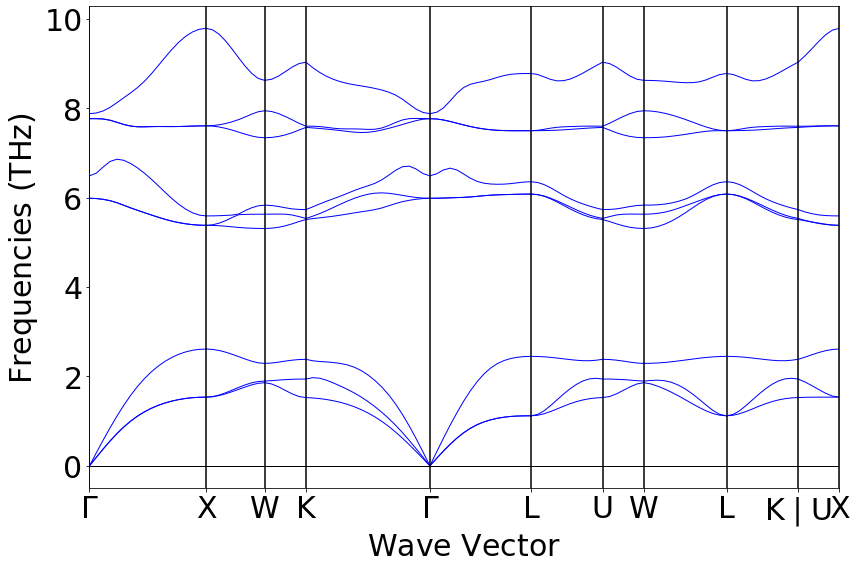

In [5]:
band = m.get_phonon_bandstructure_by_material_id(material)
bsplotter = PhononBSPlotter(band)
bsplotter.show()

# Zones de Brillouin du LiMgBi

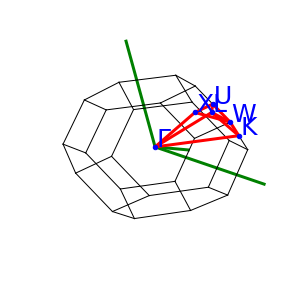

In [6]:
bsplotter.plot_brillouin()

# Vitesse du son dans les 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin

La vitesse du son dans une direction de la zone de Brillouin est donnée par la formule $ v = \frac{\partial\omega}{\partial q} = 2\pi \frac{\partial f}{\partial q}$ 

On peut estimer cette dérivée en prenant la pente autour d'un point.

La vitesse du son de la première courbe dans la direction X - W vaut 1.1560920579558753 m/s et la pente est affichée en rouge.
La vitesse du son de la quatrième courbe dans la direction K - Γ vaut 2.4754644419554945 m/s et la pente est affichée en vert.
La vitesse du son de la troisième courbe dans la direction U - W vaut 0.31433276388564024 m/s et la pente est affichée en bleu.


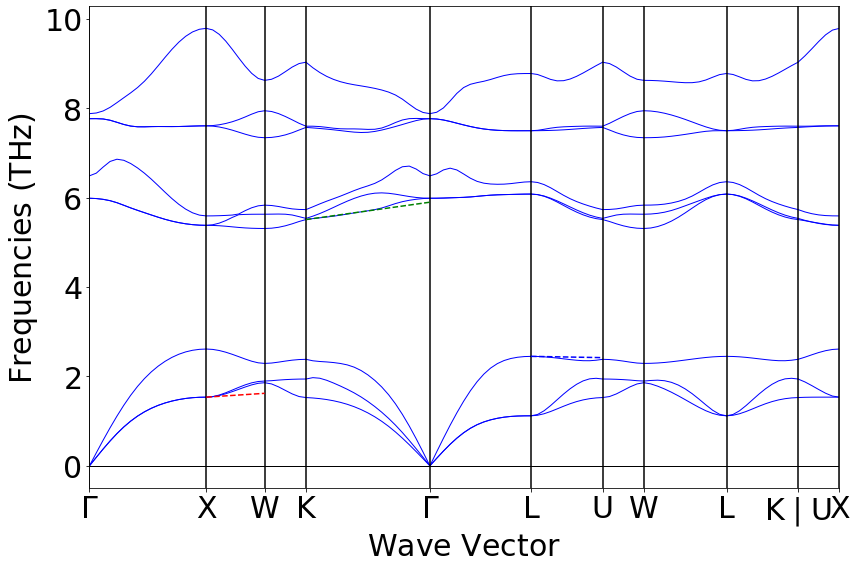

In [12]:
data = bsplotter.bs_plot_data()
d = data.get('distances')
f = data.get('frequency')

courbe1 = f[1][0]
courbe2 = f[3][3]
courbe3 = f[5][2]
d1 = d[1]
d2 = d[3]
d3 = d[5]

a1 = (courbe1[1]-courbe1[0])/(d1[1]-d1[0])
a2 = (courbe2[1]-courbe2[0])/(d2[1]-d2[0])
a3 = (courbe3[1]-courbe3[0])/(d3[1]-d3[0])

v1 = 2*np.pi*np.abs(a1)
v2 = 2*np.pi*np.abs(a2)
v3 = 2*np.pi*np.abs(a3)

x1 = np.linspace(d1[0],d1[-1],1000)
x2 = np.linspace(d2[0],d2[-1],1000)
x3 = np.linspace(d3[0],d3[-1],1000)

y1 = np.zeros(1000)
y2 = np.zeros(1000)
y3 = np.zeros(1000)

y1[0] = courbe1[0]
y2[0] = courbe2[0]
y3[0] = courbe3[0]

for i in range(1,1000):
    y1[i] = y1[0] + a1*(x1[i]-x1[0])
    y2[i] = y2[0] + a2*(x2[i]-x2[0])
    y3[i] = y3[0] + a3*(x3[i]-x3[0])
    
print("La vitesse du son de la première courbe dans la direction X - W vaut "+str(v1)+" m/s et la pente est affichée en rouge.")
print("La vitesse du son de la quatrième courbe dans la direction \u004B - \u0393 vaut "+str(v2)+" m/s et la pente est affichée en vert.")
print("La vitesse du son de la troisième courbe dans la direction U - W vaut "+str(v3)+" m/s et la pente est affichée en bleu.")

bsplotter.get_plot()
plt.plot(x1, y1, color='red', ls='--')
plt.plot(x2, y2, color='green', ls='--')
plt.plot(x3, y3, color='blue', ls='--')


plt.show()